In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Electric_Prod.csv",index_col=0,parse_dates=True)

In [3]:
df

,eprod
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [4]:
import matplotlib.pyplot as plt

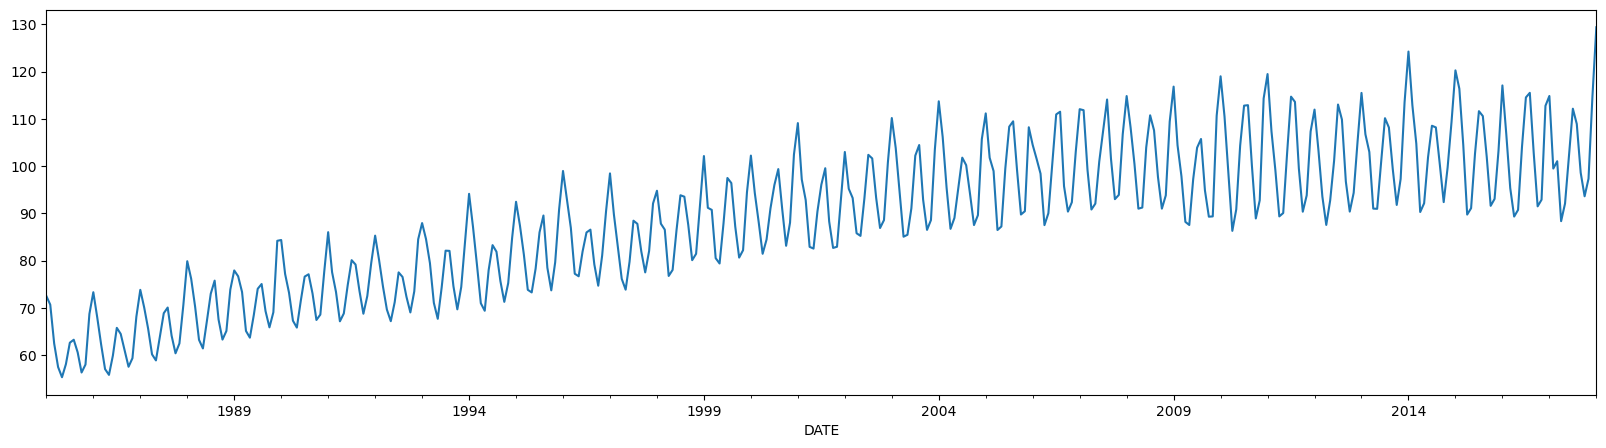

In [5]:
df['eprod'].plot(figsize=(20,5))
plt.show()

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [7]:
#dec=seasonal_decompose(df['Electricity_production'],model="add")
#dec.plot();

In [8]:
from pmdarima import auto_arima

In [9]:
auto_arima(df['eprod'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  397
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -926.413
Date:                              Mon, 18 Sep 2023   AIC                           1866.826
Time:                                      08:03:18   BIC                           1894.696
Sample:                                  01-01-1985   HQIC                          1877.868
                                       - 01-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0006      0.001      0.437      0.662      -0.002       0.003
ar.L1          0.3498      0.090      3.907      0.000       0.174       0.525
ma.L1         -0.7162      0.088     -8.161      0.000      -0.888      -0.544
ma.L2         -0.2276      0.078     -2.927      0.003      -0.380      -0.075
ar.S.L12       0.9921      0.005    186.928      0.000       0.982       1.002
ma.S.L12      -0.7322      0.042    -17.339      0.000      -0.815      -0.649
sigma2         5.8718      0.338     17.350      0.000       5.208       6.535
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                26.09
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.92   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
df_train=df.iloc[:318]
df_test=df.iloc[318:]


In [11]:
df_train.tail()

,eprod
DATE,
2011-02-01,107.3753
2011-03-01,99.1028
2011-04-01,89.3583
2011-05-01,90.0698
2011-06-01,102.8204


In [12]:
df_test.head()

,eprod
DATE,
2011-07-01,114.7068
2011-08-01,113.5958
2011-09-01,99.4712
2011-10-01,90.3566
2011-11-01,93.8095


In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(df['eprod'],order=(1,1,2),seasonal_order=(1,0,1,12))
re=model.fit()
re.summary()

C:\Users\VAIBHAV\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\VAIBHAV\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\VAIBHAV\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                eprod   No. Observations:                  397
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -940.503
Date:                              Mon, 18 Sep 2023   AIC                           1893.006
Time:                                      08:03:25   BIC                           1916.894
Sample:                                  01-01-1985   HQIC                          1902.470
                                       - 01-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7633      0.061     12.458      0.000       0.643       0.883
ma.L1         -1.1730      0.078    -15.093      0.000      -1.325      -1.021
ma.L2          0.1788      0.076      2.348      0.019       0.030       0.328
ar.S.L12       0.9925      0.004    251.297      0.000       0.985       1.000
ma.S.L12      -0.6718      0.043    -15.703      0.000      -0.756      -0.588
sigma2         6.2896      0.371     16.933      0.000       5.562       7.018
===================================================================================
Ljung-Box (L1) (Q):                   1.36   Jarque-Bera (JB):                22.38
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               2.62   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
start=len(df_train)
end=len(df_train)+len(df_test)-1
predictions=re.predict(start=start,end=end,dynamic=False,typ="levels").rename("SARIMAX(1,1,2)x(1,0,1,12) Predictions")

In [15]:
predictions

2011-07-01    110.667264
2011-08-01    114.117147
2011-09-01    102.191867
2011-10-01     92.510809
2011-11-01     93.589744
                 ...    
2017-09-01    100.208336
2017-10-01     90.718381
2017-11-01     96.160516
2017-12-01    111.527441
2018-01-01    121.155762
Freq: MS, Name: SARIMAX(1,1,2)x(1,0,1,12) Predictions, Length: 79, dtype: float64

In [16]:
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.20},expected={df_test['eprod'][i]}")

predicted=110.66726417455575415,expected=114.7068
predicted=114.11714748154471977,expected=113.5958
predicted=102.19186657389103345,expected=99.4712
predicted=92.510809163533878063,expected=90.3566
predicted=93.58974379172832414,expected=93.8095
predicted=111.94226739541338134,expected=107.3312
predicted=115.99783767579202731,expected=111.9646
predicted=105.44520914479166152,expected=103.3679
predicted=96.942783310912020056,expected=93.5772
predicted=86.216326786257283743,expected=87.5566
predicted=89.770260073624712049,expected=92.7603
predicted=103.85611952729888685,expected=101.14
predicted=111.39550699114234078,expected=113.0357
predicted=113.05368589838423077,expected=109.8601
predicted=99.229096301524450041,expected=96.7431
predicted=90.096126989031318999,expected=90.3805
predicted=93.560347603243911863,expected=94.3417
predicted=110.83400025583593163,expected=105.2722
predicted=113.68298462251337355,expected=115.501
predicted=106.91121139697649767,expected=106.734
predicted=98.4

In [17]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_test['eprod'],predictions)
print(f"SARIMAX(1,1,2)x(1,0,1,12) MSE Error:{mse:11.18}")

SARIMAX(1,1,2)x(1,0,1,12) MSE Error:10.4801166036493907


In [18]:
import math

In [19]:
RMSE=math.sqrt(mse)

In [20]:
RMSE

3.2373008206914275

[Text(0.5, 0, ''), Text(0, 0.5, '')]

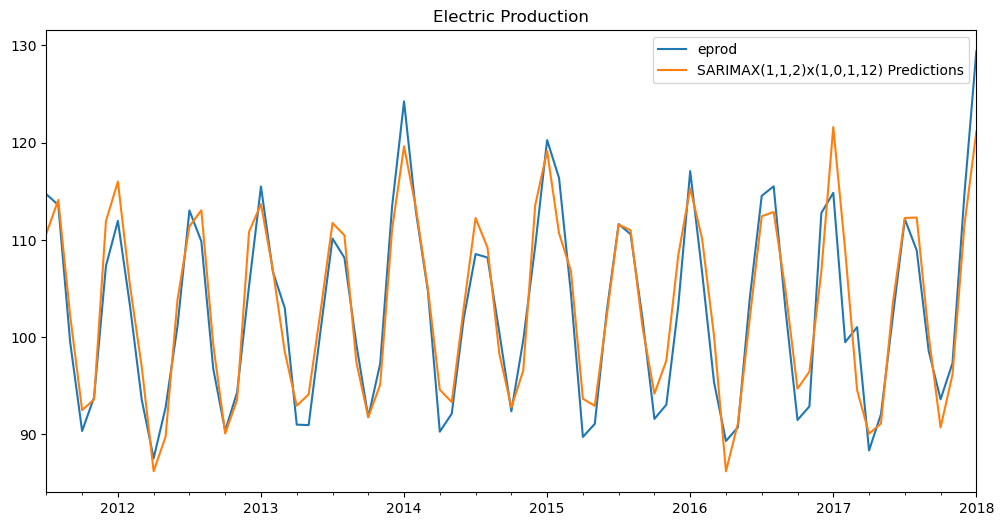

In [21]:
title="Electric Production"
ylabel=''
xlabel=''
ax=df_test['eprod'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis="x",tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)

In [22]:
model=SARIMAX(df['eprod'],order=(1,1,2),seasonal_order=(1,0,1,12))
re=model.fit()
forecast=re.predict(len(df),len(df)+10,typ='levels').rename('SARIMAX(1,1,2)x(1,0,1,12) Forecast')

C:\Users\VAIBHAV\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\VAIBHAV\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\VAIBHAV\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\VAIBHAV\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [23]:
forecast

2018-02-01    114.973165
2018-03-01    107.632317
2018-04-01     95.670082
2018-05-01     97.063139
2018-06-01    107.199447
2018-07-01    116.089236
2018-08-01    114.452608
2018-09-01    103.827830
2018-10-01     95.774398
2018-11-01     98.793895
2018-12-01    113.967122
Freq: MS, Name: SARIMAX(1,1,2)x(1,0,1,12) Forecast, dtype: float64